In [31]:
# !wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

In [32]:
# !unzip dataset.zip?dl=0

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import  img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [34]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [35]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [36]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "./train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [37]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "./train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

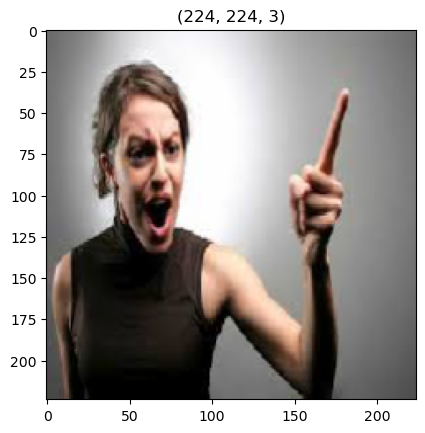

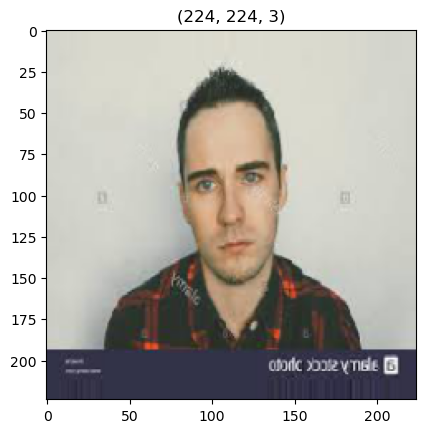

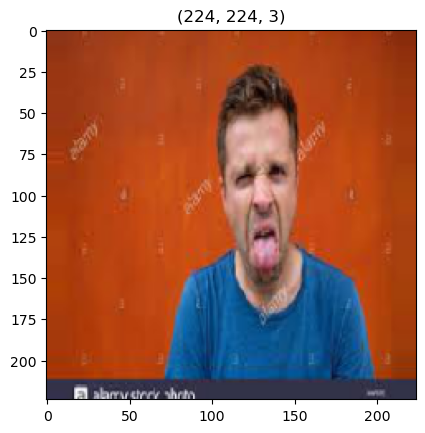

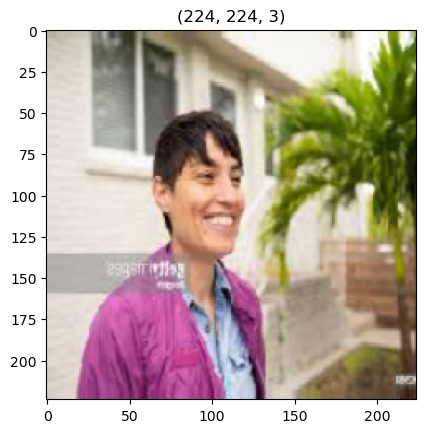

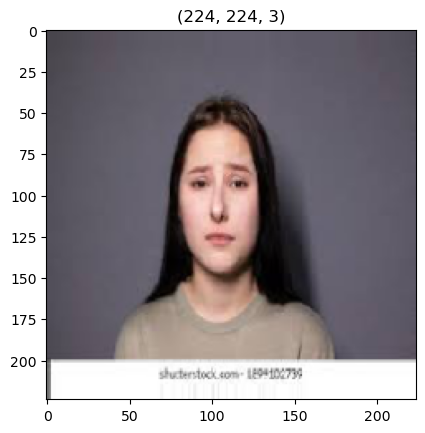

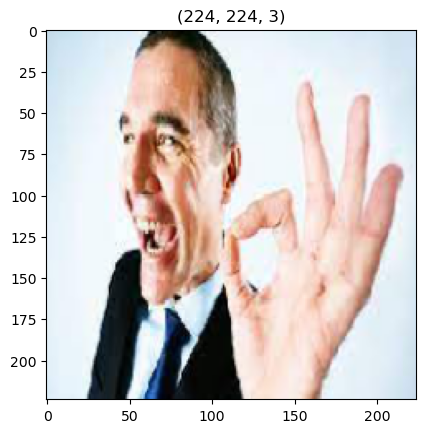

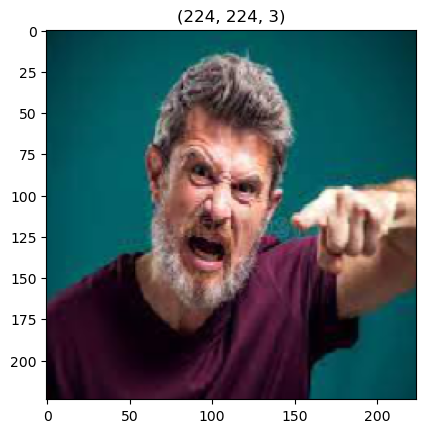

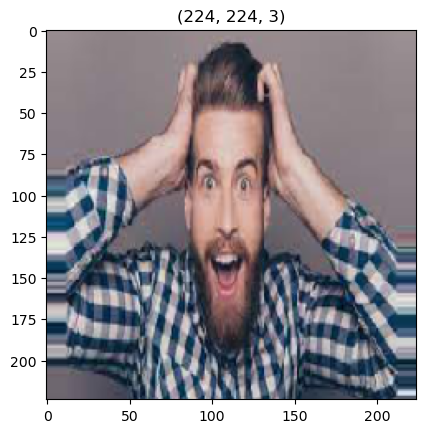

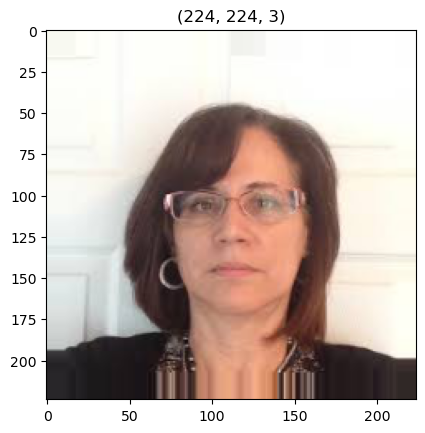

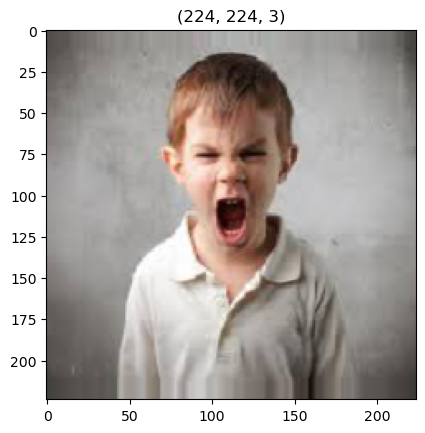

In [38]:
# to visualize the images in the traing data denerator 

t_img , label = next(train_data)

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define EarlyStopping callback
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

# Define ModelCheckpoint callback with .keras extension
mc = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# List of callbacks
callbacks = [es, mc]


In [41]:
hist = model.fit(
    train_data,  # Generator for training data
    steps_per_epoch=10,  # Number of batches to process per epoch
    epochs=30,  # Number of epochs
    validation_data=val_data,  # Generator for validation data
    validation_steps=8,  # Number of batches to process for validation
    callbacks=[es, mc]  # Callbacks like EarlyStopping and ModelCheckpoint
)

Epoch 1/30


c:\Users\Uvais siddiqui\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1657 - loss: 12.6369
Epoch 1: val_accuracy improved from -inf to 0.52734, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1706 - loss: 12.6129 - val_accuracy: 0.5273 - val_loss: 4.3560
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 5s 630ms/step - accuracy: 0.2500 - loss: 7.1851

c:\Users\Uvais siddiqui\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.52734 to 0.53191, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 346ms/step - accuracy: 0.2500 - loss: 7.1851 - val_accuracy: 0.5319 - val_loss: 3.9395
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 940ms/step - accuracy: 0.5360 - loss: 4.2964
Epoch 3: val_accuracy improved from 0.53191 to 0.67578, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5411 - loss: 4.2078 - val_accuracy: 0.6758 - val_loss: 2.0243
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 5s 591ms/step - accuracy: 0.6562 - loss: 2.6438
Epoch 4: val_accuracy improved from 0.67578 to 0.70213, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.6562 - loss: 2.6438 - val_accuracy: 0.7021 - val_loss: 1.5396
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.7832 - loss: 1.2868
Epoch 5: val_accuracy improved from 0.70213 to 0.88281, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/st

In [44]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.keras")

In [45]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

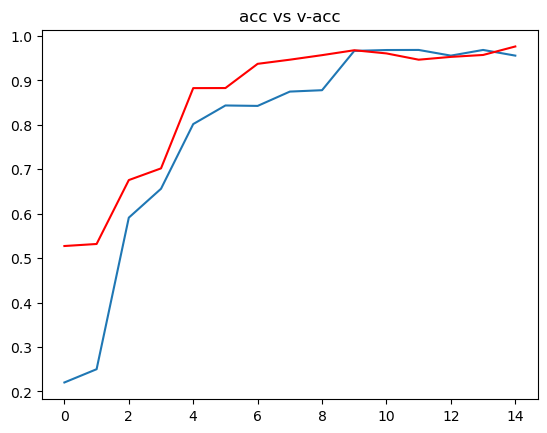

In [46]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

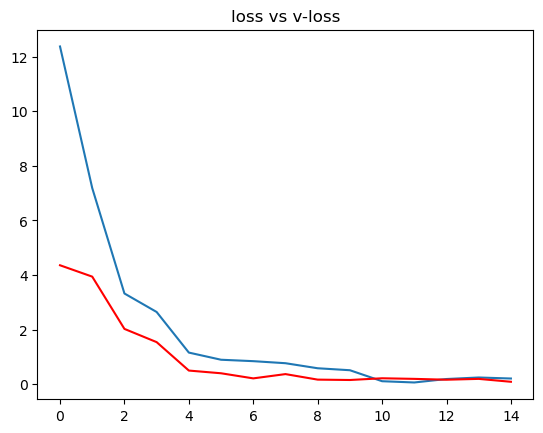

In [47]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [48]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
 the image is of Happy


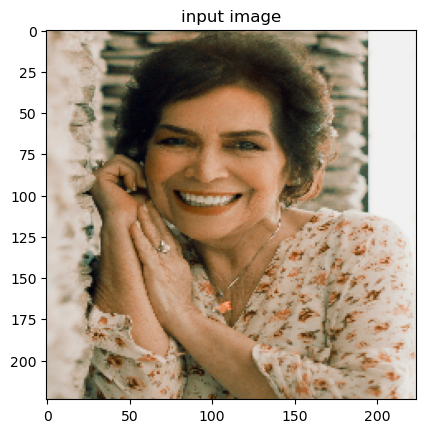

In [49]:
# # path for the image to see if it predics correct class

path = "./test.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()